**Srinivasan Govindarajan**

### Linear Regression

**Loading and preprocessing the data using Pandas, Numpy and scikit-learn. Setting aside the 20% test portion; the 80% training data partition will be used for cross-validation.**

In [1]:
#Importing the necessary packages 
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the dataset
com = pd.read_csv("C:/Users/SRINI/Downloads/communities/communities.csv", na_values =["?", "Null", "missing"])
com.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [3]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [4]:
com.describe(include = 'all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


**Handling null values**

In [5]:
com.isnull().sum().sum()

1

In [6]:
com[com.isnull().any(axis =1)]

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,28,Natchezcity,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [7]:
percap_mean = com['OtherPerCap'].mean()
com['OtherPerCap'] = com['OtherPerCap'].fillna(percap_mean)

In [8]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [9]:
com.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.00,34.00,42.00,56.0
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.63,0.85,0.94,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.651530,0.198221,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [10]:
# dropping the target variable
com1 = com.iloc[:, 2:]
com1 = com1.drop(['ViolentCrimesPerPop'], axis=1)
com1.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [11]:
# target variable
com_target = com.ViolentCrimesPerPop

In [12]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(com1, com_target, test_size =0.2, random_state =33)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


**Performing standard multiple linear regression on data using the implementation for Ch. 8 of MLA. Computing the RMSE values on the full training data (the 80% partition). Also, plotting the correlation between the predicted and actual values of the target attribute.**

In [14]:
from numpy import *

def standRegres(x,y):
    xmatrix = np.matrix(x); ymatrix = np.matrix(y).T
    xTx = xmatrix.T*xmatrix
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    wt = xTx.I * (xmatrix.T*ymatrix)
    return wt

In [15]:
x = np.array([np.concatenate((v,[1])) for v in x_train.values])
x.shape

(1595, 98)

In [16]:
y = np.array(y_train)

In [17]:
# Calculating weights
wt = standRegres(x,y)
print("total no. of weights:", len(wt))
print("weights:")

total no. of weights: 98
weights:


In [18]:
# Predicted values
xmatrix=mat(x)
ymatrix=mat(y)
ypred = xmatrix*wt
ypred

matrix([[-0.03061893],
        [ 0.62679277],
        [-0.07367866],
        ...,
        [ 0.0601588 ],
        [ 0.07807808],
        [ 0.82566635]])

C:\Users\SRINI\AppData\Local\Temp\ipykernel_24988\3862202506.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  pl.plot(ypred, y,'ro', markersize=4, color = 'blue')


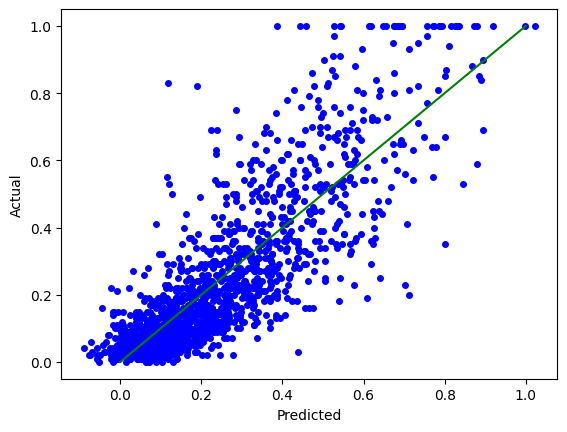

In [19]:
import pylab as pl
%matplotlib inline
pl.plot(ypred, y,'ro', markersize=4, color = 'blue')
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [20]:
print(y.shape[0])
print(ypred.shape[0])

1595
1595


In [21]:
ypred = np.array(ypred).flatten()

In [22]:
y

array([0.08, 0.4 , 0.02, ..., 0.19, 0.04, 1.  ])

In [23]:
err_train = abs(ypred - y)
print(err_train[:10])

[0.11061893 0.22679277 0.09367866 0.06462357 0.00082232 0.11137184
 0.14307097 0.0258124  0.0099833  0.27131072]


In [24]:
err_train.shape

(1595,)

In [25]:
# Sum of squared errors
sum_sq_err = np.dot(err_train, err_train)

# RMSE
rmse_train = np.sqrt(sum_sq_err/len(ypred))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.1261959313342669


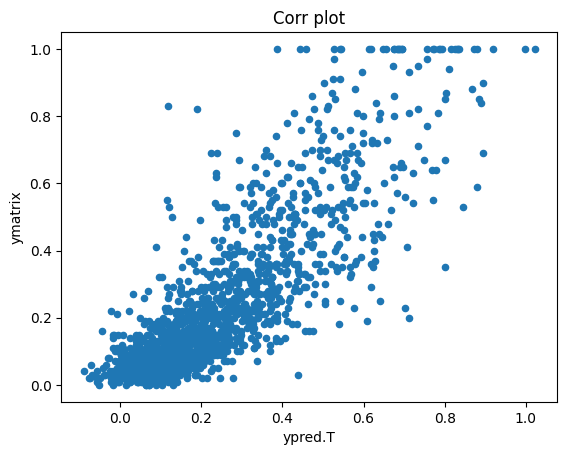

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter([ypred.T], [ymatrix], s=20)

# plot
plt.title('Corr plot')
plt.xlabel('ypred.T')
plt.ylabel('ymatrix')
plt.show()

In [27]:
x_train.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [28]:
np.set_printoptions(precision=2, linewidth=200, suppress=True, edgeitems=10)

for i in range(len(x_train.columns)):
    print("%7s    %2.2f" % (x_train.columns[i], wt[i]))

population    -0.01
householdsize    -0.05
racepctblack    0.22
racePctWhite    -0.05
racePctAsian    -0.02
racePctHisp    0.05
agePct12t21    0.10
agePct12t29    -0.17
agePct16t24    -0.13
agePct65up    0.07
numbUrban    -0.13
pctUrban    0.04
medIncome    -0.20
pctWWage    -0.21
pctWFarmSelf    0.04
pctWInvInc    -0.07
pctWSocSec    0.01
pctWPubAsst    0.02
pctWRetire    -0.10
medFamInc    0.35
perCapInc    0.08
whitePerCap    -0.35
blackPerCap    -0.03
indianPerCap    -0.04
AsianPerCap    0.03
OtherPerCap    0.05
HispPerCap    0.04
NumUnderPov    0.30
PctPopUnderPov    -0.24
PctLess9thGrade    -0.01
PctNotHSGrad    -0.05
PctBSorMore    0.08
PctUnemployed    0.02
PctEmploy    0.23
PctEmplManu    -0.05
PctEmplProfServ    -0.04
MalePctDivorce    0.35
MalePctNevMarr    0.21
FemalePctDiv    0.08
TotalPctDiv    -0.36
PersPerFam    -0.16
PctFam2Par    -0.02
PctKids2Par    -0.26
PctYoungKids2Par    -0.05
PctTeen2Par    -0.01
PctWorkMomYoungKids    0.01
PctWorkMom    -0.16
NumIlleg    -0.27


In [29]:
len(wt)

98

In [30]:
x_train.shape[1]

97

In [31]:
x.shape[1]

98

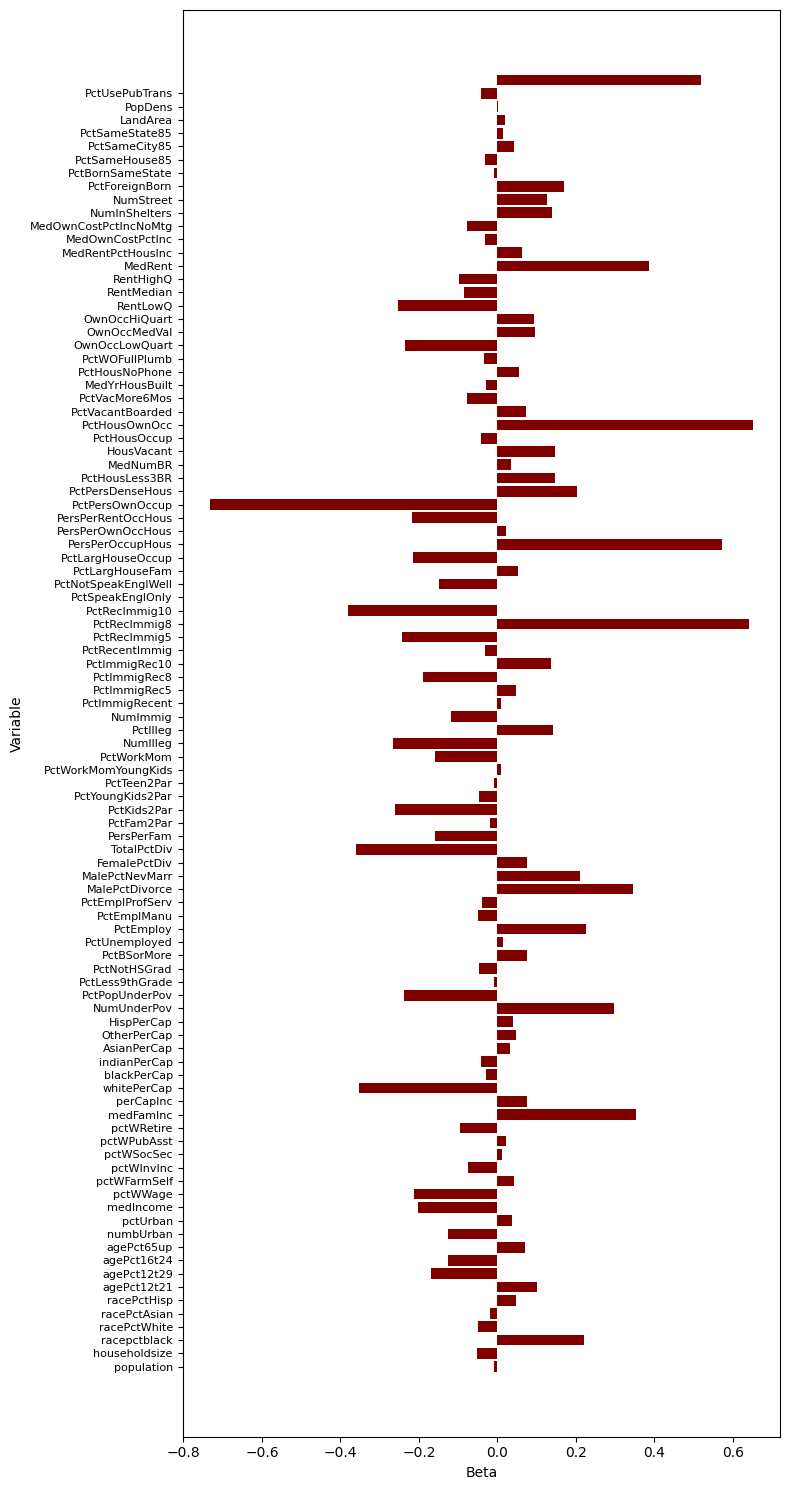

In [32]:
# plot for Regression weights
import matplotlib.pyplot as plt

# changing figure size
plt.figure(figsize=(8, 15))

# Plotting the coefficient values
plt.barh(range(x.shape[1]), np.array(wt).flatten(), align='center', color = 'maroon')

plt.xlabel("Beta")
plt.ylabel("Variable")
plt.yticks(range(len(x_train.columns)), x_train.columns, fontsize=8)
plt.tight_layout()

plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
    
from sklearn.model_selection import KFold
def cross_validate(model, X, y, n, verbose=False):
    
    kf = KFold(n_splits=n) 
                                            
    xval_err = 0
    f = 1
    for t1,t2 in kf.split(X):
        model.fit(X[t1],y[t1]) 
        p_test = model.predict(X[t2]) 
        rmse_test = np.sqrt(mean_squared_error(p_test, y[t2]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
        xval_err += rmse_test
        f += 1
    return xval_err/n

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Mean RMSE on 10-fold CV
rmse_10cv = cross_validate(lr, x, y, 10, verbose=True)

Fold  1 RMSE: 0.1437
Fold  2 RMSE: 0.1385
Fold  3 RMSE: 0.1330
Fold  4 RMSE: 0.1360
Fold  5 RMSE: 0.1351
Fold  6 RMSE: 0.1323
Fold  7 RMSE: 0.1192
Fold  8 RMSE: 0.1216
Fold  9 RMSE: 0.1367
Fold 10 RMSE: 0.1468


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cv_score = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_score)))

[0.14 0.14 0.13 0.14 0.14 0.13 0.12 0.12 0.14 0.15]


In [37]:
print('RMSE for training:',rmse_train)
print('RMSE for 10-fold CV:', rmse_10cv)

RMSE for training: 0.1261959313342669
RMSE for 10-fold CV: 0.1342954778833917


**Feature Selection:  using the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score

In [39]:
!pip install tabulate

In [40]:
from tabulate import tabulate

def select_features(X, Y, model, percentile_range):
    final = []
    optimal_percentile = None
    score = float('-inf')
    
    for percentile in percentile_range:
        # feature selection
        selector = SelectPercentile(percentile=percentile)
        selected_feature = selector.fit_transform(X, Y)
        
        # cross-validation
        scores = cross_val_score(model, selected_feature, Y, cv=5)
        average = scores.mean()

        final.append([percentile, average])
        
        if average > score:
            score = average
            optimal_percentile = percentile
    
    table_headers = ["Percentile", "Score"]
    print(tabulate(final, headers=table_headers, floatfmt=".2f"))
    
    return optimal_percentile

In [41]:
lr = LinearRegression()
percentile_range = range(1, 100, 5)
optimal_percentile = select_features(x_train, y_train, lr, percentile_range)
print(optimal_percentile)

  Percentile    Score
------------  -------
           1     0.55
           6     0.61
          11     0.62
          16     0.63
          21     0.64
          26     0.65
          31     0.65
          36     0.65
          41     0.65
          46     0.65
          51     0.65
          56     0.65
          61     0.65
          66     0.65
          71     0.65
          76     0.66
          81     0.66
          86     0.66
          91     0.66
          96     0.66
86


I'm using percentile of 26 

In [42]:
# Selecting the top 50% of the most important features

from sklearn.feature_selection import SelectPercentile, f_regression

# Selecting the top 50% of the most important features
f_selection = SelectPercentile(f_regression, percentile=26)

# Apply feature selection to the entire matrix
x_train_feat = f_selection.fit_transform(x_train, y_train)

print(x_train.shape)  # 97 features.
print(x_train_feat.shape)  #  25 features.

(1595, 97)
(1595, 25)


In [43]:
print(x_train.columns[f_selection.get_support()].values) 

['racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc' 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov' 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv'
 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg' 'PctIlleg' 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone']


In [44]:
len(x_train.columns[f_selection.get_support()].values)

25

In [45]:
for i in range(len(x_train.columns.values)):
    if f_selection.get_support()[i]:
        print("%10s  %3.2f" % (x_train.columns.values[i], f_selection.scores_[i]))

racepctblack  1074.89
racePctWhite  1412.51
 medIncome  341.63
pctWInvInc  756.01
pctWPubAsst  784.57
 medFamInc  366.90
NumUnderPov  400.31
PctPopUnderPov  578.82
PctNotHSGrad  472.20
PctUnemployed  533.91
MalePctDivorce  602.77
FemalePctDiv  704.77
TotalPctDiv  693.14
PctFam2Par  1657.87
PctKids2Par  1972.80
PctYoungKids2Par  1342.17
PctTeen2Par  1299.54
  NumIlleg  431.64
  PctIlleg  1936.12
PctPersOwnOccup  630.76
PctPersDenseHous  375.65
PctHousLess3BR  487.96
PctHousOwnOcc  478.53
PctVacantBoarded  507.64
PctHousNoPhone  505.86


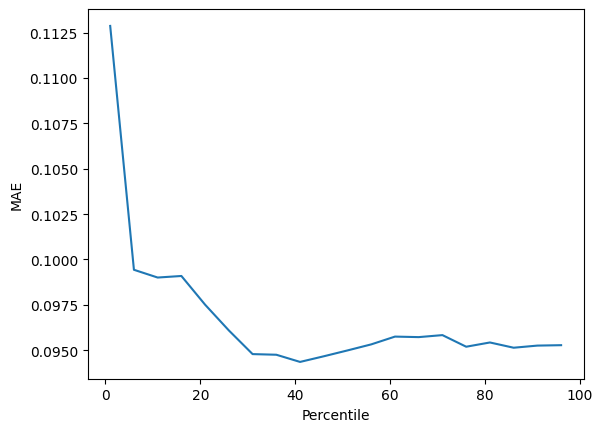

In [46]:
from sklearn import metrics

lr = LinearRegression()

percentiles = range(1, 100, 5)
mae = []

for i in range(1, 100, 5):
    f_selection = SelectPercentile(f_regression, percentile=i)
    x_train_feat = f_selection.fit_transform(x_train, y_train)
    scores = cross_val_score(lr, x_train_feat, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae.append(np.abs(scores).mean())

# Plot
plt.plot(percentiles, mae)
plt.xlabel('Percentile')
plt.ylabel('MAE')
plt.show()

**Performing Ridge Regression and Lasso Regression using the modules from sklearn.linear_model.** 

In [47]:
from sklearn.linear_model import Ridge

In [48]:
x_train1 = x_train.copy()
x_train1 = x_train1.reset_index(drop=True)
y_train1 = y_train.copy()
y_train1 = y_train1.reset_index(drop=True)

In [49]:
pd.options.display.max_rows = None
x_train1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.01,0.54,0.02,0.91,0.27,0.04,0.37,0.41,0.25,0.28,...,0.01,0.00,0.29,0.42,0.72,0.74,0.62,0.01,0.20,0.47
1,0.99,0.42,0.59,0.44,0.11,0.11,0.44,0.56,0.37,0.39,...,0.30,0.12,0.14,0.71,0.52,0.79,0.75,0.28,0.55,0.62
2,0.01,0.53,0.02,0.95,0.15,0.03,0.27,0.37,0.18,0.23,...,0.01,0.00,0.17,0.54,0.38,0.24,0.51,0.11,0.03,0.09
3,0.07,0.41,0.02,0.97,0.05,0.02,0.32,0.49,0.31,0.44,...,0.00,0.00,0.13,0.88,0.76,0.74,0.84,0.05,0.27,0.40
4,0.05,0.41,0.11,0.85,0.23,0.03,0.32,0.52,0.26,0.10,...,0.00,0.00,0.17,0.33,0.20,0.23,0.05,0.09,0.12,0.01
5,0.02,0.71,0.17,0.41,0.72,0.64,0.41,0.45,0.28,0.32,...,0.00,0.00,0.82,0.45,0.55,0.84,0.75,0.02,0.24,0.18
6,0.11,0.52,1.00,0.15,0.02,0.01,0.58,0.57,0.41,0.33,...,0.02,0.00,0.02,0.80,0.50,0.69,0.71,0.16,0.12,0.10
7,0.03,0.66,0.13,0.73,0.61,0.07,1.00,1.00,1.00,0.21,...,0.01,0.00,0.34,0.48,0.02,0.00,0.00,0.01,0.45,0.34
8,0.16,0.44,0.05,0.76,0.53,0.21,0.37,0.49,0.30,0.29,...,0.03,0.01,0.42,0.49,0.42,0.54,0.62,0.08,0.32,0.56
9,0.03,0.35,0.67,0.47,0.02,0.01,0.45,0.48,0.36,0.66,...,0.01,0.01,0.02,0.80,0.51,0.75,0.75,0.03,0.18,0.05


In [50]:
y_train1

0       0.08
1       0.40
2       0.02
3       0.18
4       0.07
5       0.33
6       0.56
7       0.15
8       0.22
9       0.76
10      0.88
11      0.52
12      0.06
13      0.04
14      0.02
15      0.01
16      0.17
17      0.07
18      0.21
19      0.03
20      0.08
21      0.91
22      0.26
23      0.43
24      0.15
25      0.45
26      0.28
27      0.03
28      0.06
29      0.19
30      0.28
31      0.01
32      0.21
33      0.26
34      0.18
35      0.08
36      0.03
37      0.04
38      0.11
39      0.17
40      0.48
41      0.28
42      0.69
43      0.16
44      0.42
45      0.09
46      0.07
47      0.12
48      0.37
49      0.12
50      0.06
51      0.08
52      0.18
53      0.20
54      0.33
55      0.07
56      0.60
57      0.30
58      0.03
59      0.11
60      0.06
61      0.62
62      0.21
63      0.07
64      0.10
65      0.15
66      0.14
67      0.06
68      0.06
69      0.03
70      0.09
71      0.09
72      0.02
73      0.04
74      0.15
75      0.19
76      0.20

In [51]:
def best_alpha(model,x,y):

  # RMSE for training data
  model.fit(x,y)
  pred_train = model.predict(x)
  rmse_train = np.sqrt(mean_squared_error(pred_train,y))

  # RMSE using 10-fold cross validation
  rmse_5cv = cross_validate(model, x_train1, y_train1, 5)

  gap = rmse_5cv - rmse_train

  return rmse_train, rmse_5cv, gap, t_rmse, cv_rmse

In [52]:
from sklearn.linear_model import Ridge

In [53]:
x_train1 = np.array(x_train1)
x_train1

array([[0.01, 0.54, 0.02, 0.91, 0.27, 0.04, 0.37, 0.41, 0.25, 0.28, ..., 0.01, 0.  , 0.29, 0.42, 0.72, 0.74, 0.62, 0.01, 0.2 , 0.47],
       [0.99, 0.42, 0.59, 0.44, 0.11, 0.11, 0.44, 0.56, 0.37, 0.39, ..., 0.3 , 0.12, 0.14, 0.71, 0.52, 0.79, 0.75, 0.28, 0.55, 0.62],
       [0.01, 0.53, 0.02, 0.95, 0.15, 0.03, 0.27, 0.37, 0.18, 0.23, ..., 0.01, 0.  , 0.17, 0.54, 0.38, 0.24, 0.51, 0.11, 0.03, 0.09],
       [0.07, 0.41, 0.02, 0.97, 0.05, 0.02, 0.32, 0.49, 0.31, 0.44, ..., 0.  , 0.  , 0.13, 0.88, 0.76, 0.74, 0.84, 0.05, 0.27, 0.4 ],
       [0.05, 0.41, 0.11, 0.85, 0.23, 0.03, 0.32, 0.52, 0.26, 0.1 , ..., 0.  , 0.  , 0.17, 0.33, 0.2 , 0.23, 0.05, 0.09, 0.12, 0.01],
       [0.02, 0.71, 0.17, 0.41, 0.72, 0.64, 0.41, 0.45, 0.28, 0.32, ..., 0.  , 0.  , 0.82, 0.45, 0.55, 0.84, 0.75, 0.02, 0.24, 0.18],
       [0.11, 0.52, 1.  , 0.15, 0.02, 0.01, 0.58, 0.57, 0.41, 0.33, ..., 0.02, 0.  , 0.02, 0.8 , 0.5 , 0.69, 0.71, 0.16, 0.12, 0.1 ],
       [0.03, 0.66, 0.13, 0.73, 0.61, 0.07, 1.  , 1.  , 1.  , 

In [54]:
x_train1.shape

(1595, 97)

In [55]:
y_train1 = np.array(y_train1)
y_train1

array([0.08, 0.4 , 0.02, 0.18, 0.07, 0.33, 0.56, 0.15, 0.22, 0.76, ..., 0.07, 0.34, 0.03, 0.22, 0.18, 0.16, 0.08, 0.19, 0.04, 1.  ])

In [56]:
y_train1.shape

(1595,)

Finding optimal alpha for Ridge Regression

In [57]:
print('alpha\t RMSE_train\t RMSE_5cv\t Gap\n')

alpha = np.linspace(.01,4.0,50)
t_rmse= []
cv_rmse = []


for i in alpha:
  model = Ridge(alpha= i)
  rmse_train1, rmse_5cv, gap, t_rmse, cv_rmse = best_alpha(model,x, y)

  t_rmse = np.append(t_rmse, [rmse_train1])
  cv_rmse = np.append(cv_rmse, [rmse_5cv])

  print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(i,rmse_train1,rmse_5cv,gap))

alpha	 RMSE_train	 RMSE_5cv	 Gap

0.010	 0.1262		 0.1341		 0.0079
0.091	 0.1263		 0.1337		 0.0073
0.173	 0.1265		 0.1335		 0.0070
0.254	 0.1266		 0.1334		 0.0068
0.336	 0.1267		 0.1333		 0.0066
0.417	 0.1268		 0.1333		 0.0065
0.499	 0.1269		 0.1333		 0.0063
0.580	 0.1270		 0.1332		 0.0062
0.661	 0.1271		 0.1332		 0.0061
0.743	 0.1272		 0.1332		 0.0060
0.824	 0.1273		 0.1332		 0.0060
0.906	 0.1273		 0.1332		 0.0059
0.987	 0.1274		 0.1332		 0.0058
1.069	 0.1275		 0.1332		 0.0057
1.150	 0.1275		 0.1332		 0.0057
1.231	 0.1276		 0.1332		 0.0056
1.313	 0.1277		 0.1332		 0.0056
1.394	 0.1277		 0.1332		 0.0055
1.476	 0.1278		 0.1332		 0.0055
1.557	 0.1278		 0.1332		 0.0054
1.639	 0.1279		 0.1333		 0.0054
1.720	 0.1279		 0.1333		 0.0053
1.801	 0.1280		 0.1333		 0.0053
1.883	 0.1280		 0.1333		 0.0052
1.964	 0.1281		 0.1333		 0.0052
2.046	 0.1281		 0.1333		 0.0052
2.127	 0.1282		 0.1333		 0.0051
2.209	 0.1282		 0.1333		 0.0051
2.290	 0.1283		 0.1333		 0.0051
2.371	 0.1283		 0.1334		 0.0050
2.453	

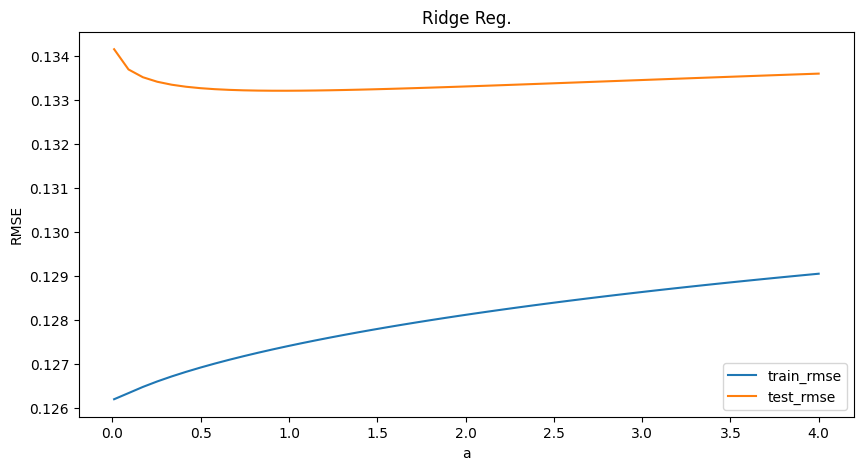

In [58]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='train_rmse')
ax.plot(alpha, cv_rmse, label='test_rmse')
pl.legend( ('train_rmse', 'test_rmse') )
pl.ylabel('RMSE')
pl.xlabel('a')
pl.title('Ridge Reg.')
pl.show()

test rmse is low around 0.25. So, I'm choosing 0.25 as best alpha.

In [59]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ridge = Ridge(alpha=0.25)

# Fitting the model
ridge.fit(x_train1, y_train1)

ypred_train = ridge.predict(x_train) # p_train is the array of predicted training values
train_rmse = np.sqrt(mean_squared_error(ypred_train, y_train))

# Compute RMSE on test set

ypred_test = ridge.predict(x_test) # predictions on the test instances
test_rmse = np.sqrt(mean_squared_error(ypred_test, y_test))

print('RMSE on training:', train_rmse)
print('RMSE on test data:', test_rmse)

RMSE on training: 0.12659957936701235
RMSE on test data: 0.14314434052455305


In [60]:
from sklearn.linear_model import Lasso

Finding optimal alpha for Lasso Regression

In [61]:
print('alpha\t RMSE_train\t RMSE_5cv\t Gap\n')

alpha = np.linspace(.01,4.0,50) # create an array of 50 evenly spaced numbers between 0.01 and 4.0
t_rmse= []
cv_rmse = []


for i in alpha:
  model = Lasso(alpha= i)
  rmse_train1, rmse_5cv, gap, t_rmse, cv_rmse = best_alpha(model,x, y)

  t_rmse = np.append(t_rmse, [rmse_train1])
  cv_rmse = np.append(cv_rmse, [rmse_5cv])

  print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(i,rmse_train1,rmse_5cv,gap))

alpha	 RMSE_train	 RMSE_5cv	 Gap

0.010	 0.1520		 0.1521		 0.0001
0.091	 0.2312		 0.2310		 -0.0001
0.173	 0.2312		 0.2310		 -0.0001
0.254	 0.2312		 0.2310		 -0.0001
0.336	 0.2312		 0.2310		 -0.0001
0.417	 0.2312		 0.2310		 -0.0001
0.499	 0.2312		 0.2310		 -0.0001
0.580	 0.2312		 0.2310		 -0.0001
0.661	 0.2312		 0.2310		 -0.0001
0.743	 0.2312		 0.2310		 -0.0001
0.824	 0.2312		 0.2310		 -0.0001
0.906	 0.2312		 0.2310		 -0.0001
0.987	 0.2312		 0.2310		 -0.0001
1.069	 0.2312		 0.2310		 -0.0001
1.150	 0.2312		 0.2310		 -0.0001
1.231	 0.2312		 0.2310		 -0.0001
1.313	 0.2312		 0.2310		 -0.0001
1.394	 0.2312		 0.2310		 -0.0001
1.476	 0.2312		 0.2310		 -0.0001
1.557	 0.2312		 0.2310		 -0.0001
1.639	 0.2312		 0.2310		 -0.0001
1.720	 0.2312		 0.2310		 -0.0001
1.801	 0.2312		 0.2310		 -0.0001
1.883	 0.2312		 0.2310		 -0.0001
1.964	 0.2312		 0.2310		 -0.0001
2.046	 0.2312		 0.2310		 -0.0001
2.127	 0.2312		 0.2310		 -0.0001
2.209	 0.2312		 0.2310		 -0.0001
2.290	 0.2312		 0.2310		 -0.0001
2.371	 0.2

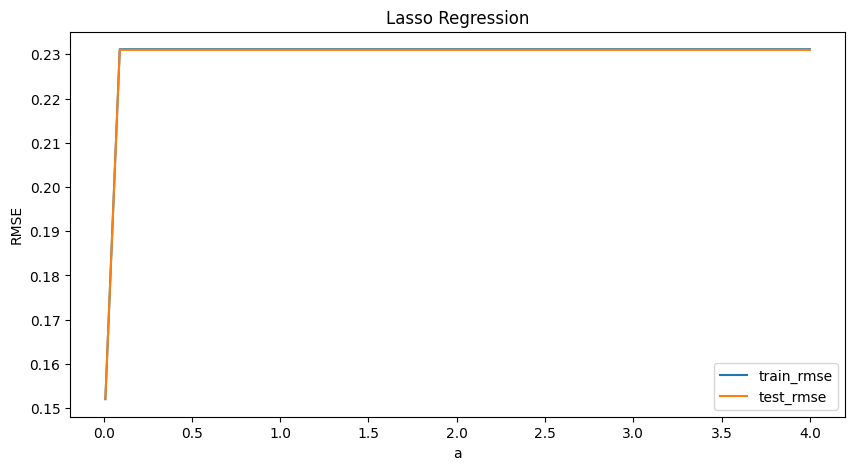

In [62]:
# Lasso Regression
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='train_rmse')
ax.plot(alpha, cv_rmse, label='test_rmse')
pl.legend( ('train_rmse', 'test_rmse') )
pl.ylabel('RMSE')
pl.xlabel('a')
pl.title('Lasso Regression')
pl.show()

As both training rmse curve and testing rmse are on top of each other, I'm choosing 0.0 as best alpha where the rmse value is low for both training and testing.

In [63]:
lasso = Lasso(alpha=0.0)

# Fitting the model
lasso.fit(x_train1, y_train1)

ypred_train = lasso.predict(x_train) # p_train is the array of predicted training values
train_rmse = np.sqrt(mean_squared_error(ypred_train, y_train))

# Compute RMSE on test set

ypred_test = lasso.predict(x_test) # predictions on the test instances
test_rmse = np.sqrt(mean_squared_error(ypred_test, y_test))

print('RMSE on training:', train_rmse)
print('RMSE on test data:', test_rmse)

RMSE on training: 0.12620051273023222
RMSE on test data: 0.14345035508843432


**Performing regression using Stochastic Gradient Descent for regression, using the SGDRegessor module from sklearn.linear_model.**

In [64]:
# Stochastic Gradient Descent for Regression
from sklearn.linear_model import SGDRegressor

In [65]:
print(x.shape)
print(y.shape)

(1595, 98)
(1595,)


In [66]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [67]:
normalizer = StandardScaler()
normalizer.fit(x_train)
x_trainn = normalizer.transform(x_train)
x_testn = normalizer.transform(x_test)

In [68]:
# grid search
grid = {
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

grid_sch = GridSearchCV(SGDRegressor(), grid, cv=5)
grid_sch.fit(x_trainn, y_train)

parameters = grid_sch.best_params_
model = grid_sch.best_estimator_

In [69]:
print(parameters)
print(model)

{'alpha': 0.0001, 'penalty': 'l1'}
SGDRegressor(penalty='l1')


In [70]:
# Applying model to the test data
y_pred_ = model.predict(x_testn)
mse_test = mean_squared_error(y_test, y_pred_)
rmse_test = np.sqrt(mse_test)

In [71]:
print("RMSE on Test Data: {:.4f}".format(rmse_test))

RMSE on Test Data: 0.1488


In [72]:
# Using Elastic Net
grid_elastic = {
    'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]
}

# Perform grid search to find the best l1_ratio
grid_sch_elastic = GridSearchCV(SGDRegressor(penalty='elasticnet', alpha=parameters['alpha']), grid_elastic, cv=5)
grid_sch_elastic.fit(x_trainn, y_train)

# Get the best l1_ratio and model
l1_ratio = grid_sch_elastic.best_params_['l1_ratio']
model_elastic = grid_sch_elastic.best_estimator_

In [73]:
print(l1_ratio)
print(model_elastic)

0.8
SGDRegressor(l1_ratio=0.8, penalty='elasticnet')


In [74]:
# Applying Elastic Net model to the test data
y_pred_elastic = model_elastic.predict(x_testn)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)

In [75]:
print("l1_ratio: {:.2f}".format(l1_ratio))
print("RMSE on Test Data: {:.4f}".format(rmse_elastic))

l1_ratio: 0.80
RMSE on Test Data: 0.1465
